In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
url = 'https://raw.githubusercontent.com/gchoi/Dataset/master/OldFaithful.csv'
data_csv = pd.read_csv(url)

data_csv

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


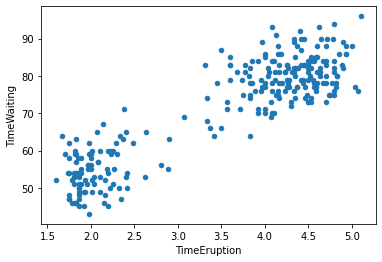

In [185]:
data_csv.plot(x ='TimeEruption', y='TimeWaiting', kind = 'scatter')
plt.show()

In [186]:
centroids = []
m=data_csv.max()
n=data_csv.min()
random.seed(2000)
for _ in range(2):
        r = np.random.randint(n, m)
        centroids.append(r)
centroids

[array([ 2, 88]), array([ 3, 73])]

In [187]:
def distance(a,b):
  return np.sqrt((a[0]-b[0])**2 +(a[1]-b[1])**2)

In [188]:
def Estep(df,centre):
    sum=0
    for i in range(df.shape[0]):
        distance1=distance(df.iloc[i],centre[0])
        distance2=distance(df.iloc[i],centre[1])
        if distance1<=distance2:
            df.iloc[i,2]=0
            sum=sum+distance1
        else:
            df.iloc[i,2]=1
            sum=sum+distance2
        # print(distance1,distance2)
    return df,sum

In [189]:
def Mstep(df):
  centre=df.groupby(df['zij']).mean() 
  return centre.iloc[0],centre.iloc[1]

-0.05


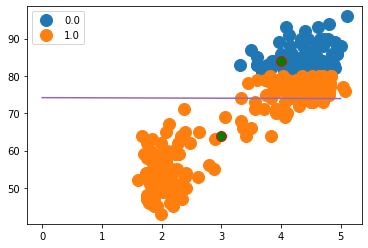

-0.08333333333333333


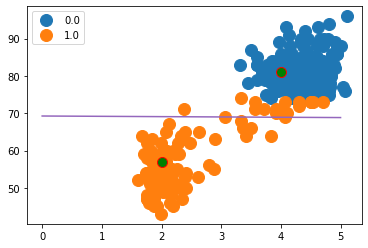

-0.07692307692307693


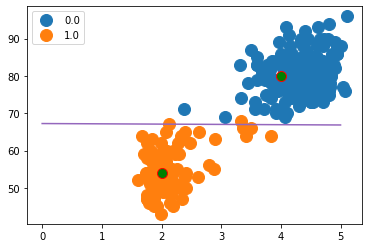

-0.07692307692307693


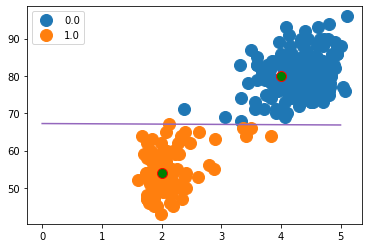

In [190]:
import copy
delta=0.00000001
y=[]
cost_arr=[]
prev=np.zeros((2,2))
zij=np.zeros(data_csv.shape[0])
data_csv['zij']=zij
count=0
while(distance(centroids[0],prev[0])+distance(centroids[1],prev[1])>delta):
  prev=copy.deepcopy(centroids)
  data_csv,cost=Estep(data_csv,centroids)
  cost_arr.append(cost)
  temp1,temp2=Mstep(data_csv)
  centroids[0][0]=temp1[0]
  centroids[0][1]=temp1[1]
  centroids[1][0]=temp2[0]
  centroids[1][1]=temp2[1]
  #print(centroids[0])
  count+=1
  # print(count)
  y.append(count)
  # if count%10==0:
  #   plt.scatter(data_csv["TimeEruption"],data_csv["TimeWaiting"],c=data_csv["zij"],cmap="red")
  groups = data_csv.groupby('zij')
  for name, group in groups:
    plt.plot(group.TimeEruption, group.TimeWaiting, marker='o', linestyle='', markersize=12, label=name)
  plt.plot(centroids[0][0], centroids[0][1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
  plt.plot(centroids[1][0], centroids[1][1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
  slope = (float)(centroids[1][1] - centroids[0][1]) /(float) (centroids[1][0] - centroids[0][0])
  slope = -1/(float)(slope)
  x = np.linspace(0,5,100)
  xm=(centroids[0][0]+centroids[1][0])/2.0
  ym=(centroids[0][1]+centroids[1][1])/2.0
  print(slope)
  yg=(x-xm)*(slope) + ym
  plt.plot(x,yg)
  plt.legend(loc='upper left')
  plt.show()

  
  # print(distance(centroids[0],prev[0])+distance(centroids[1],prev[1]))

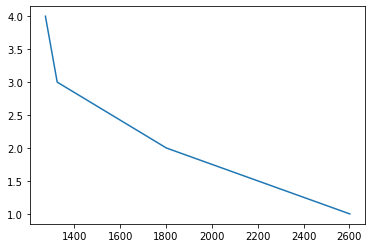

In [191]:

plt.plot(cost_arr,y)

plt.show()